### Import models and load data

In [1]:
from torchvision import datasets
import torch
import dlc_practical_prologue as prologue
import matplotlib.pyplot as plt

# Import all models
from BaseNet import *
from ConvNet1 import *
#from NetSharing import *

mini_batch_size = 1000
nb_epochs = 300
nb_runs = 2
eta = 0.001

train_input, train_target, train_classes, test_input, test_target, test_classes = \
    prologue.generate_pair_sets(nb=1000)

/usr/local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


### 1channel2images

In [2]:
from importlib import reload
import _1channel2images
reload(_1channel2images)
from _1channel2images import *

print("Working with 1channel2images framework, nb_classes = ", nb_classes)

#model = BaseNet1C(nb_classes)
model_1C = ConvNet1_1C(nb_classes)
optimizer_1C = torch.optim.SGD(model_1C.parameters(), lr=eta, momentum=0.95)
test_results_1C = multiple_training_runs(model_1C, 2, optimizer_1C, train_input, train_classes,
                                      test_input, test_target, test_classes, mini_batch_size, nb_epochs)
write_to_csv('1channel2images.csv', model_1C, test_results_1C)

Working with 1channel2images framework, nb_classes =  10


KeyboardInterrupt: 

In [ ]:
# This is just for visualization of our results but it will have to be taken away for the report 
# since we can't use any additional libraries
import pandas as pd

print(test_results_1C)
write_to_csv('1channel2images.csv', model_1C, test_results_1C)
data = pd.read_csv('1channel2images.csv')
data.head()

### 2channels1image

In [ ]:
import _2channels1image
reload(_2channels1image)
from _2channels1image import *

print("Working with 2channels1image framework, nb_classes = ", nb_classes)

model_2C = ConvNet1_2C(nb_classes)
optimizer_2C = torch.optim.SGD(model_2C.parameters(), lr=0.00001, momentum=0.95)  
test_results_2C = multiple_training_runs(model_2C, 2, optimizer_2C, train_input, train_target,
                           test_input, test_target, mini_batch_size, nb_epochs)
write_to_csv('2channels1image.csv', model_2C, test_results_2C)

In [ ]:
print(test_results_2C)
write_to_csv('2channels1image.csv', model_2C, test_results_2C)
data = pd.read_csv('2channels1image.csv')
data.head()

### Weight Sharing

In [ ]:
import weight_sharing
reload(weight_sharing)
from weight_sharing import *

print("Working with weight_sharing framework")

model_ws = NetSharing1()
optimizer_ws = torch.optim.SGD(model_ws.parameters(), lr=0.00001, momentum=0.95)  
test_results_ws = multiple_training_runs(model_ws, nb_runs, optimizer_ws, train_input, train_target,
                           test_input, test_target, mini_batch_size, nb_epochs)
write_to_csv('weightsharing.csv', model_ws, test_results_ws)

In [ ]:
print(test_results_ws)
write_to_csv('weightsharing.csv', model_ws, test_results_ws)
data = pd.read_csv('weightsharing.csv')
data.head()

### Auxiliary Losses

import auxiliary_losses
reload(auxiliary_losses)
from auxiliary_losses import *
import Incept1
reload(Incept1)
from Incept1 import *
nb_epochs = 300
print("Working with auxiliary losses framework")

model_aux = Incept1()
optimizer_aux = torch.optim.SGD(model_aux.parameters(), lr=0.00001, momentum=0.95)  
test_results_aux = multiple_training_runs(model_aux, nb_runs, optimizer_aux, train_input, train_target, train_classes, 
                                          test_input, test_target, test_classes, mini_batch_size, nb_epochs)
write_to_csv('auxiliary_losses.csv', model_aux, test_results_aux)

In [ ]:
print(test_results_aux)
write_to_csv('auxiliary_losses.csv', model_aux, test_results_aux)
data = pd.read_csv('auxiliary_losses.csv')
data.head()

### Weight Sharing Model (Youssef)

In [2]:
print(train_input.shape, train_target.shape, train_classes.shape, test_input.shape, test_target.shape, test_classes.shape)

torch.Size([1000, 2, 14, 14]) torch.Size([1000]) torch.Size([1000, 2]) torch.Size([1000, 2, 14, 14]) torch.Size([1000]) torch.Size([1000, 2])


In [3]:
from torch.autograd import Variable
from WSharingModel import *
from torch import nn, optim

#### Function that draws the evolution of the loss during training.

In [4]:
def visualize_loss(model,loss_model):
    plt.plot(loss_model[0],loss_model[1], color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Evolution of the loss during training of the model{:>13}.'.format(model.__class__.__name__))
    plt.show()

#### Function that prints the results of the prediction one the model is trained.

In [16]:
def print_results(model,optimizer,learning_rate,NB_EPOCHS,MINI_BATCH_SIZE, train_input, train_target,test_input, test_target):
     print('model: {:>13}, optimizer: {:>10}, learning rate: {:6}, num epochs: {:3}, '
                    'mini batch size: {:3}, train error: {:5.2f}%, test error: {:5.2f}%'.format(
                    model.__class__.__name__,
                    optimizer.__name__,
                    learning_rate,
                    NB_EPOCHS,
                    MINI_BATCH_SIZE,
                    compute_nb_errors(model, train_input, train_target, MINI_BATCH_SIZE) / train_input.size(0) * 100,
                    compute_nb_errors(model, test_input, test_target, MINI_BATCH_SIZE) / test_input.size(0) * 100
                    )
                )

In [5]:
# normalize it
mean, std = train_input.mean(), train_input.std() 
train_input.sub_(mean).div_(std)
test_input.sub_(mean).div_(std)

train_input, train_target, train_classes = Variable(train_input), Variable(train_target), Variable(train_classes)
test_input, test_target = Variable(test_input), Variable(test_target)

In [6]:
NB_EPOCHS = 25
MINI_BATCH_SIZE = 100
learning_rates = [1e-1, 1e-2, 1e-3]
model = WSModel() ## Weight Sharing model with main architecture.

In [13]:
op = torch.optim.SGD

In [14]:
optimizer = op(model.parameters(),lr = learning_rates[0])

#### Training of the WSModel.

In [8]:
loss_aux = train_model_WS(model,optimizer,train_input,train_target,NB_EPOCHS,MINI_BATCH_SIZE)

Loss at   0 : 0.660163164138794  
Loss at   1 : 0.6536742448806763  
Loss at   2 : 0.5576585531234741  
Loss at   3 : 0.5088069438934326  
Loss at   4 : 0.43094712495803833  
Loss at   5 : 0.3865504562854767  
Loss at   6 : 0.40857768058776855  
Loss at   7 : 0.37665581703186035  
Loss at   8 : 0.3212539553642273  
Loss at   9 : 0.32554858922958374  
Loss at  10 : 0.28370919823646545  
Loss at  11 : 0.2541072368621826  
Loss at  12 : 0.2493949830532074  
Loss at  13 : 0.2255144715309143  
Loss at  14 : 0.24386805295944214  
Loss at  15 : 0.213222935795784  
Loss at  16 : 0.18370649218559265  
Loss at  17 : 0.17774610221385956  
Loss at  18 : 0.20518255233764648  
Loss at  19 : 0.14126701653003693  
Loss at  20 : 0.13087227940559387  
Loss at  21 : 0.16473288834095  
Loss at  22 : 0.10496553778648376  
Loss at  23 : 0.09924695640802383  
Loss at  24 : 0.0849386602640152  


#### Results on Training and Testing set.

In [17]:
print_results(model,op,learning_rates[0],NB_EPOCHS,MINI_BATCH_SIZE, train_input, train_target,test_input, test_target)

model:       WSModel, optimizer:        SGD, learning rate:    0.1, num epochs:  25, mini batch size: 100, train error:  0.20%, test error: 13.70%


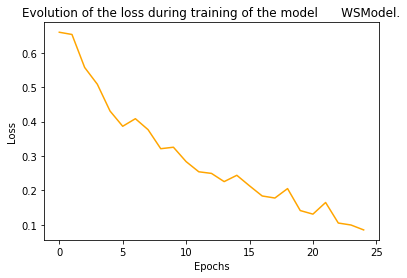

In [19]:
visualize_loss(model,loss_aux)

### Auxiliary Loss Model (Youssef)

In [20]:
import torch
from torchvision import datasets
from torch import optim
import dlc_practical_prologue as prologue
from AuxModel import *
from torch.autograd import Variable
from torch.nn import functional as F

In [27]:
model = AuxModel() ## Auxiliaryloss model with main architecture.

In [22]:
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rates[0])

#### Training of the AuxModel.

In [23]:
loss_aux = train_model_AM(model, optimizer,  train_input, train_target, train_classes,NB_EPOCHS,MINI_BATCH_SIZE)

Loss at   0 : 5.261308193206787  
Loss at   1 : 5.16166877746582  
Loss at   2 : 5.137136459350586  
Loss at   3 : 4.6822357177734375  
Loss at   4 : 4.441250801086426  
Loss at   5 : 4.446071624755859  
Loss at   6 : 3.907452344894409  
Loss at   7 : 4.025806427001953  
Loss at   8 : 3.222829818725586  
Loss at   9 : 2.569108486175537  
Loss at  10 : 2.358966827392578  
Loss at  11 : 1.9259467124938965  
Loss at  12 : 1.7242460250854492  
Loss at  13 : 1.6312466859817505  
Loss at  14 : 1.897026777267456  
Loss at  15 : 1.2340689897537231  
Loss at  16 : 1.9339656829833984  
Loss at  17 : 1.4165364503860474  
Loss at  18 : 1.3629921674728394  
Loss at  19 : 1.3215510845184326  
Loss at  20 : 1.282139778137207  
Loss at  21 : 1.242224097251892  
Loss at  22 : 1.2212860584259033  
Loss at  23 : 1.1891661882400513  
Loss at  24 : 1.0359306335449219  


#### Results on Training and Testing set.

In [24]:
print_results(model,op,learning_rates[0],NB_EPOCHS,MINI_BATCH_SIZE, train_input, train_target,test_input, test_target)

model:      AuxModel, optimizer:        SGD, learning rate:    0.1, num epochs:  25, mini batch size: 100, train error:  5.30%, test error:  9.10%


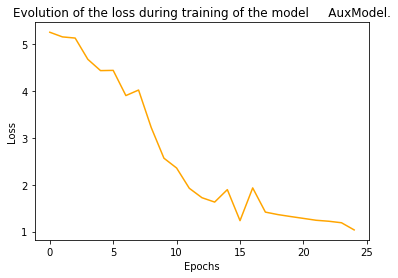

In [25]:
visualize_loss(model,loss_aux)

In [26]:
compute_nb_errors(model, test_input, test_target, mini_batch_size)

91